### Задание № 3


#### Тема: Свёрточные нейронные сети

Распознавание изображений из набора данных MNIST, CIFAR-10 и базы автомобилей с помощью свёрточных нейронных сетей

### Задание Ultra Lite

Переписать ноутбук по распознаванию рукописных цифр своими руками, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание сверточной нейронной сети.
5. Обучение сверточной нейронной сети.
Можно смотреть в ноутбук с занятия, но код писать самостоятельно.


### Задание Lite




Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии (можно использовать любую нейросеть с занятия, либо создать свою свёрточную сеть).

Поменять количество нейронов (фильтров) в скрытом сверточном слое и обучить сеть, использовав следующие значения:
○ первая сеть - скрытый слой 2 нейрона

○ вторая сеть - тот же скрытый слой 4 нейрона

○ третья сеть - тот же скрытый слой 16 нейронов

Поменять активационную функцию в скрытых слоях с relu на linear
Поменять размеры batch_size:
○ 10

○ 100

○ Вся база (50000)

Записать в таблицу получившиеся точности.
Написать выводы по результатам проведенных тестов.

### Задание Pro




Провести ряд экспериментов с архитектурой нейронной сети:

Исследовать влияние количества слоев conv2d.

Исследовать влияние количества нейронов (фильтров) в слоях conv2d.

Исследовать влияние MaxPooling2D в сети.

Исследовать влияние Dropout.

Написать выводы по результатам проведенных тестов. 
 

### Задание Ultra pro




Добейтесь точности не менее 85% на проверочной выборке на базе трех иномарок. 

Размер проверочной выборки - 20%.


#### 1. Импорт библиотек.

In [2]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image #Для отрисовки изображений
import random 
import math
import os #Для работы с файлами 
%matplotlib inline

**2. Загрузка базы mnist**


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

**3. Нормирование и преобразование x_train и y_train**

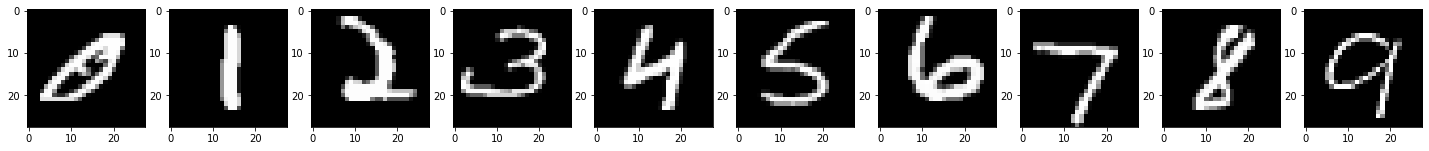

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) 
  img = x_train[index] 
  axs[i].imshow(Image.fromarray(img), cmap='gray')
plt.show() 

In [6]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)#Надо добавить в конце размерность 1
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)#Чтобы свёрточная сеть понимала, что это чёрно-белые данные

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**4. Нейронная сеть**

In [8]:
batch_size = 128 
model = Sequential()#Создаем последовательную модель
model.add(BatchNormalization(input_shape=(28, 28, 1)))#Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))#Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2)))#Первый слой подвыборки
model.add(Dropout(0.25))#Слой регуляризации Dropout
model.add(Flatten())
model.add(Dense(256, activation='relu'))#Полносвязный слой для классификации
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))#Выходной полносвязный слой
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])#Компилируем сеть

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

**5. Обучение сверточной нейронной сети**

Epoch 1/15
469/469 [==============================] - 80s 168ms/step - loss: 0.1588 - accuracy: 0.9513 - val_loss: 0.0462 - val_accuracy: 0.9850
Epoch 2/15
469/469 [==============================] - 69s 146ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0322 - val_accuracy: 0.9881
Epoch 3/15
469/469 [==============================] - 71s 150ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 4/15
469/469 [==============================] - 61s 130ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0304 - val_accuracy: 0.9905
Epoch 5/15
469/469 [==============================] - 60s 128ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 6/15
469/469 [==============================] - 196s 418ms/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 7/15
469/469 [==============================] - 64s 136ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0325 - val_a

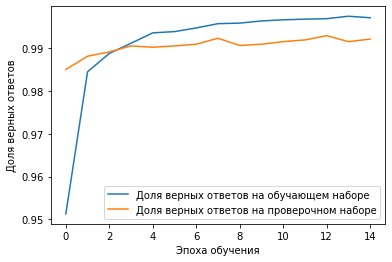

In [10]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Определение цифр из тестовой выборки**

In [11]:
n = np.random.randint(x_test.shape[0])
prediction = model.predict(x_test)#Получаем выход сети 

print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

Выход сети:  [2.8934912e-12 1.7117725e-04 1.5224083e-09 1.3809566e-09 1.3564626e-12
 9.0561100e-12 9.2574581e-16 9.9982882e-01 8.0549831e-11 4.7848476e-09]
Распознанная цифра:  7
Верный ответ:  7


**Определение цифр на реальных фотографиях**

In [16]:
import png

reader = png.Reader( path-to-16bit-png )
pngdata = reader.read()
px_array = np.array( map( np.uint16, pngdata[2] )
print( px_array.dtype )

'/Users/ekaterina/Desktop/LEARN/IT/УИИ/Введение в нейронные сети/3_digits'

In [18]:
pip install unzip

  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1330 sha256=1ba69c103791ab41a816b65171751e77735040dd5c8b440237a22dd3917793fe
  Stored in directory: /Users/ekaterina/Library/Caches/pip/wheels/90/bd/0f/a2797a7e90de1cdd91548fba3b16a7c2560e14a268bb137101
Successfully built unzip
Note: you may need to restart the kernel to use updated packages.


In [29]:
#!unzip '/Users/ekaterina/Desktop/LEARN/IT/УИИ/Введение в нейронные сети/3_digits.zip' #Извлечем файлы из архива

In [25]:
import zipfile 

In [27]:
zip_archive = zipfile.ZipFile("/Users/ekaterina/Desktop/LEARN/IT/УИИ/Введение в нейронные сети/3_digits.zip", "r")

In [28]:
for file_info in zip_archive.infolist(): 
    print(file_info.filename, file_info.date_time, file_info.file_size)

3_digits/ (2020, 4, 20, 20, 52, 2) 0
__MACOSX/._3_digits (2020, 4, 20, 20, 52, 2) 212
3_digits/8.png (2020, 4, 20, 20, 32, 40) 13014
__MACOSX/3_digits/._8.png (2020, 4, 20, 20, 32, 40) 212
3_digits/9.png (2020, 4, 20, 20, 51, 28) 12684
__MACOSX/3_digits/._9.png (2020, 4, 20, 20, 51, 28) 212
3_digits/4.png (2020, 4, 20, 20, 32, 36) 9747
__MACOSX/3_digits/._4.png (2020, 4, 20, 20, 32, 36) 212
3_digits/5.png (2020, 4, 20, 20, 32, 38) 11613
__MACOSX/3_digits/._5.png (2020, 4, 20, 20, 32, 38) 212
3_digits/7.png (2020, 4, 20, 20, 51, 28) 11303
__MACOSX/3_digits/._7.png (2020, 4, 20, 20, 51, 28) 212
3_digits/6.png (2020, 4, 20, 20, 32, 38) 11663
__MACOSX/3_digits/._6.png (2020, 4, 20, 20, 32, 38) 212
3_digits/2.png (2020, 4, 20, 20, 32, 34) 10710
__MACOSX/3_digits/._2.png (2020, 4, 20, 20, 32, 34) 212
3_digits/3.png (2020, 4, 20, 20, 32, 36) 11387
__MACOSX/3_digits/._3.png (2020, 4, 20, 20, 32, 36) 212
3_digits/1.png (2020, 4, 20, 20, 32, 34) 9534
__MACOSX/3_digits/._1.png (2020, 4, 20, 20, 3

In [31]:
#Выводим для примера картинки по каждому классу
def change_contrast(img, factor): #Функция для увеличения контрастности 
    def contrast(pixel): #Функция для изменения цвета пикселя
        return 128 + factor * (pixel - 128) 
    return img.point(contrast)

xTestReal = [] #Создаем x_test для загруженных картинок
yTestReal = [] #Создаем y_test для классов изображений

for i in range(10): #Проходим по классам от 0 до 9
  img_path = '3_digits/' + str(i) + '.png' #Определяем имя изображения
  img = image.load_img(img_path, grayscale=True, target_size=(28, 28))
  img1 = change_contrast(img, factor=5.0) #Увеличиваем контрастность изображения
  xTestReal.append(255 - np.asarray(img1)) #Инвертируем изображение и добавляем в выборку
  yTestReal.append(i) #Добавляем в y_train номера классов

xTestReal = np.array(xTestReal) #Преобразуем в Numpy array
yTestReal = np.array(yTestReal) 

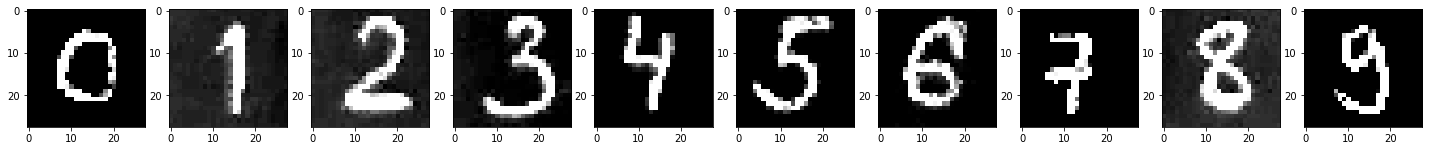

In [32]:
#Выводим для примера картинки по каждому классу
fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray') #Конвертируем изображение в черно-белый формат и отображаем i-ым графиков
plt.show()

In [33]:
#Меняем формат данных
xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

In [34]:
prediction = model.predict(xTestReal) #Классифицируем каждое изображение
for i in range(10): 
  print("Распознанный образ:", np.argmax(prediction[i]), '. Верный ответ', yTestReal[i])

Распознанный образ: 0 . Верный ответ 0
Распознанный образ: 1 . Верный ответ 1
Распознанный образ: 2 . Верный ответ 2
Распознанный образ: 3 . Верный ответ 3
Распознанный образ: 4 . Верный ответ 4
Распознанный образ: 5 . Верный ответ 5
Распознанный образ: 6 . Верный ответ 6
Распознанный образ: 7 . Верный ответ 7
Распознанный образ: 8 . Верный ответ 8
Распознанный образ: 9 . Верный ответ 9


### Конец ДЗ Ultra Lite

#### Распознавание изображений из набора данных Cifar10


In [35]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170508288/170498071 [==============================] - 23s 0us/step


In [36]:
x_train10.shape

(50000, 32, 32, 3)

In [37]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

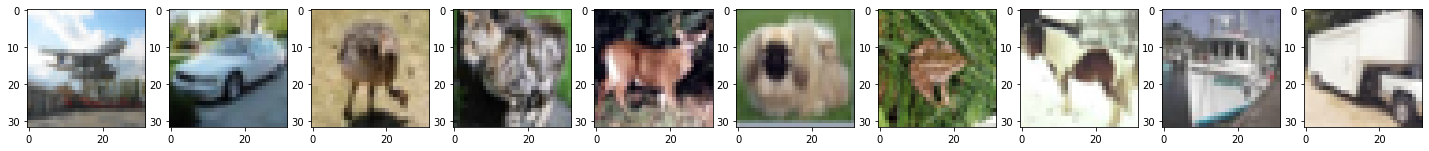

In [38]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [39]:
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [40]:
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


**Нейронная сеть**

Epoch 1/20
391/391 [==============================] - 175s 446ms/step - loss: 1.4606 - accuracy: 0.4640 - val_loss: 1.2522 - val_accuracy: 0.5599
Epoch 2/20
391/391 [==============================] - 167s 426ms/step - loss: 1.0396 - accuracy: 0.6296 - val_loss: 0.8569 - val_accuracy: 0.6947
Epoch 3/20
391/391 [==============================] - 1848s 5s/step - loss: 0.8674 - accuracy: 0.6928 - val_loss: 0.8768 - val_accuracy: 0.7070
Epoch 4/20
391/391 [==============================] - 192s 490ms/step - loss: 0.7622 - accuracy: 0.7323 - val_loss: 0.7113 - val_accuracy: 0.7501
Epoch 5/20
391/391 [==============================] - 158s 404ms/step - loss: 0.6910 - accuracy: 0.7581 - val_loss: 0.6509 - val_accuracy: 0.7779
Epoch 6/20
391/391 [==============================] - 181s 462ms/step - loss: 0.6305 - accuracy: 0.7777 - val_loss: 0.6095 - val_accuracy: 0.7917
Epoch 7/20
391/391 [==============================] - 165s 421ms/step - loss: 0.5870 - accuracy: 0.7946 - val_loss: 0.6087 - v

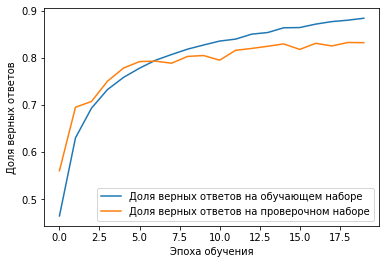

In [41]:
batch_size = 128 

model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Определение изображений из тестовой выборки**

In [42]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

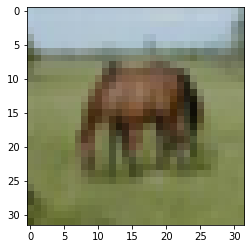

Выход сети:  [2.6731777e-11 4.8064818e-13 1.0032209e-06 6.8420163e-09 3.2214642e-02
 2.6135138e-05 2.0727243e-11 9.6775818e-01 2.9800165e-16 7.8893494e-13]
Распознанный образ:  7
Верный ответ:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Распознанный браз на картинке:  лошадь


In [43]:
n = np.random.randint(x_test10.shape[0])

plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])